In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/20200403-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,82802,78,3331,4,Local transmission,0
1,South Korea,10062,86,174,5,Local transmission,0
2,Australia,5224,248,23,2,Local transmission,0
3,Malaysia,3116,208,50,5,Local transmission,0
4,Philippines,2633,322,107,11,Local transmission,0
...,...,...,...,...,...,...,...
201,Burundi,2,0,0,0,Imported cases only,2
202,Sierra Leone,2,0,0,0,Imported cases only,1
203,Réunion,308,27,0,0,Local transmission,0
204,Mayotte,128,12,2,0,Local transmission,0


In [2]:
df = df[df['Country/Territory'] != 'conveyance (Diamond']

In [3]:
death_rate = df['Total Deaths']/df['Total Confirmed']*100
df['Death Rate'] = death_rate
df

c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,82802,78,3331,4,Local transmission,0,4.022850
1,South Korea,10062,86,174,5,Local transmission,0,1.729278
2,Australia,5224,248,23,2,Local transmission,0,0.440276
3,Malaysia,3116,208,50,5,Local transmission,0,1.604621
4,Philippines,2633,322,107,11,Local transmission,0,4.063806
...,...,...,...,...,...,...,...,...
200,Malawi,3,3,0,0,Local transmission,0,0.000000
201,Burundi,2,0,0,0,Imported cases only,2,0.000000
202,Sierra Leone,2,0,0,0,Imported cases only,1,0.000000
203,Réunion,308,27,0,0,Local transmission,0,0.000000


In [4]:
countries_infected = len(df)
print('The total number of countries infected is:',countries_infected)

The total number of countries infected is: 205


In [5]:
df = df.sort_values(by=['Death Rate'],ascending=False)

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
191,Angola,8,0,2,0,Imported cases only,1,25.000000
199,Gambia,4,1,1,0,Imported cases only,0,25.000000
198,Botswana,4,1,1,0,Imported cases only,0,25.000000
107,Sudan,8,1,2,0,Local transmission,0,25.000000
134,Guyana,19,0,4,2,Local transmission,1,21.052632
142,Nicaragua,5,0,1,0,Imported cases only,1,20.000000
196,Cabo Verde,5,0,1,0,Imported cases only,6,20.000000
18,Northern Mariana,8,2,1,1,Local transmission,0,12.500000
105,Syrian Arab Republic,16,6,2,0,Imported cases only,0,12.500000
193,Zimbabwe,8,0,1,0,Local transmission,2,12.500000


In [6]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfMinNumCases = df[df['Total Confirmed'] > minimum_number_cases]
dfMinNumCases = dfMinNumCases.reset_index(drop=True)
dfMinNumCases.index = np.arange(1, (len(dfMinNumCases)+1))

dfMinNumCases[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,115242,4668,13917,760,Local transmission,0,12.076326
2,Indonesia,1790,113,170,13,Local transmission,0,9.497207
3,Netherlands,14697,1083,1339,166,Local transmission,0,9.110703
4,Spain,110238,8102,10003,950,Local transmission,0,9.074004
5,United Kingdom,33722,4244,2921,389,Local transmission,0,8.662001
6,France,58327,2066,4490,471,Local transmission,0,7.697979
7,Belgium,15348,1384,1011,183,Local transmission,0,6.587177
8,Iran,50468,2875,3160,124,Local transmission,0,6.261393
9,Sweden,5466,519,282,43,Local transmission,0,5.159166
10,Dominican Republic,1380,96,60,3,Local transmission,0,4.347826


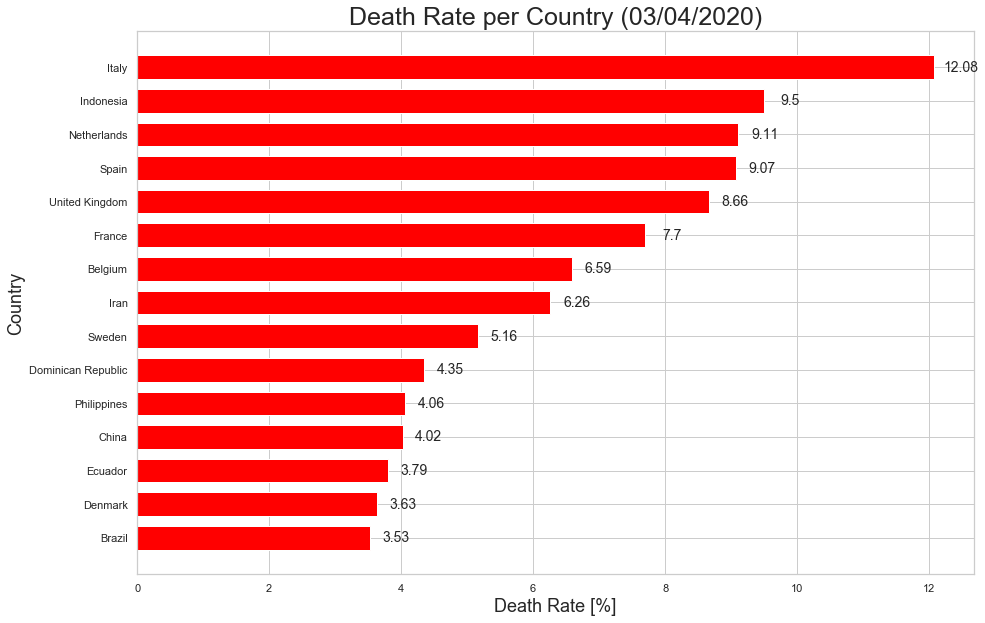

In [7]:
#matplotlib defaults
sns.set(style="whitegrid")
top15_deathrate = dfMinNumCases[0:15]
death_rate = top15_deathrate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']


plt.figure(figsize=(15,10))
plt.barh(top15_deathrate['Country/Territory'],top15_deathrate['Death Rate'],height=0.7, color='red')
plt.title('Death Rate per Country (03/04/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

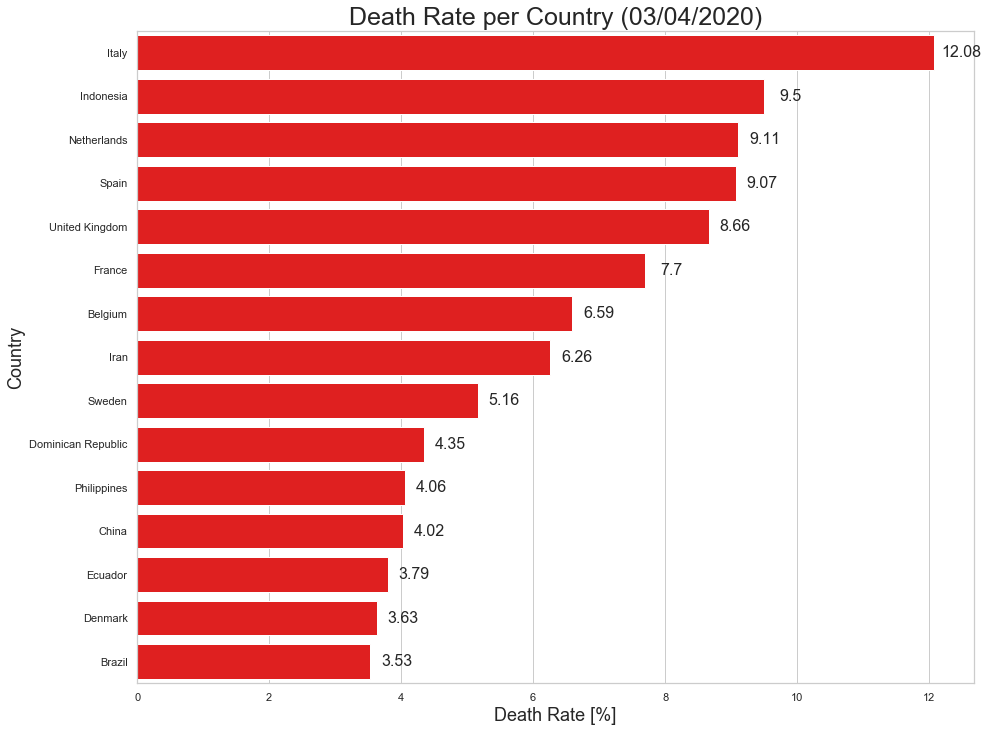

In [8]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_deathrate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (03/04/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


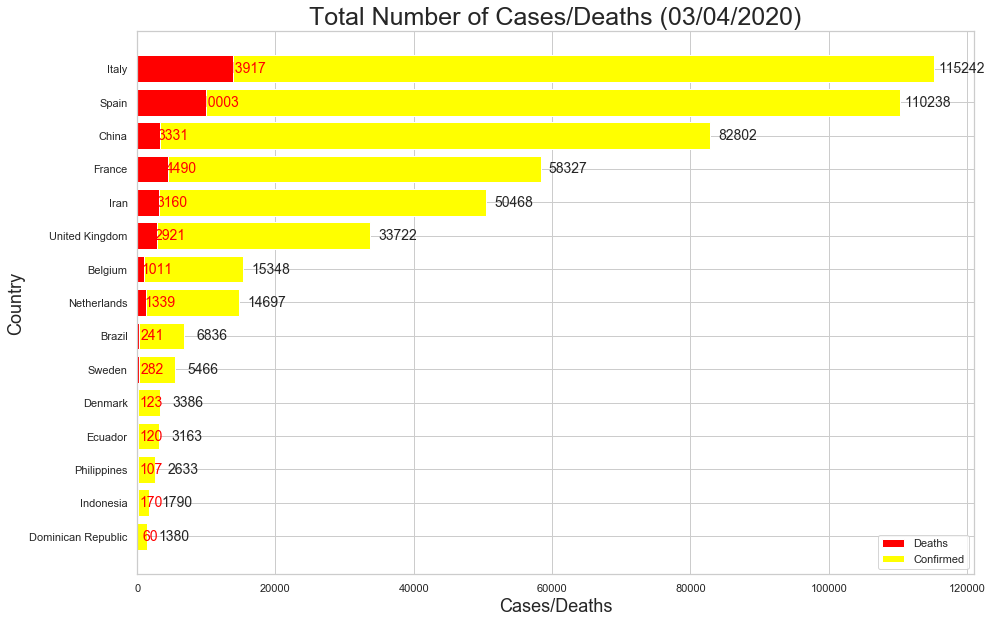

In [9]:
#matplotlib defaults
top15_confirmed = top15_deathrate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

plt.figure(figsize=(15,10))
p1 = plt.barh(countries,deaths, color='red')
p2 = plt.barh(countries,diference,left=deaths, color='yellow')
plt.title('Total Number of Cases/Deaths (03/04/2020)',fontsize=25)
plt.xlabel('Cases/Deaths',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.legend((p1[0], p2[0]), ('Deaths', 'Confirmed'), loc='lower right')
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

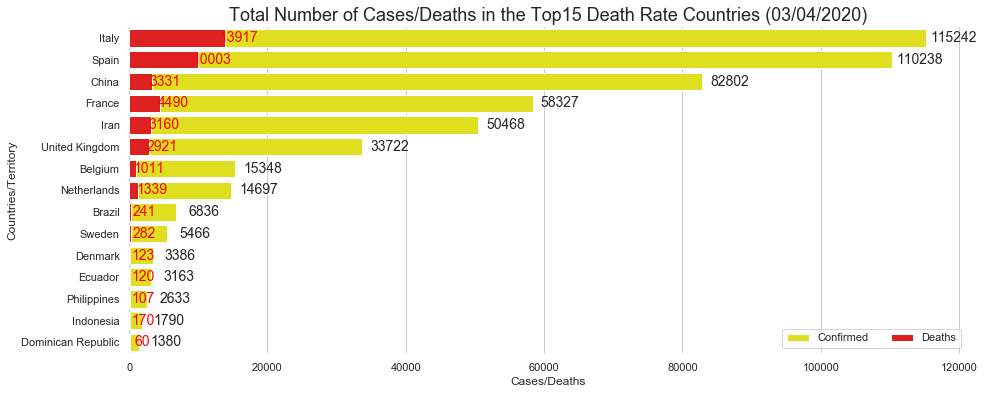

In [10]:
#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (03/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200403_TotalNumberCasesDeaths.png', bbox_inches='tight')

In [11]:
dfDSLRC = df.sort_values(by=['Days since last reported case'],ascending=False)#dfDSLRC = dataframe Days since last reported case
dfDSLRC[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
15,Papua New Guinea,1,0,0,0,Imported cases only,13,0.000000
88,Timor-Leste,1,0,0,0,Imported cases only,13,0.000000
137,Dominica,11,0,0,0,Local transmission,7,0.000000
160,Anguilla,2,0,0,0,Local transmission,7,0.000000
189,Eswatini,9,0,0,0,Imported cases only,6,0.000000
140,Suriname,8,0,0,0,Imported cases only,6,0.000000
157,Montserrat,5,0,0,0,Imported cases only,6,0.000000
196,Cabo Verde,5,0,1,0,Imported cases only,6,20.000000
141,Antigua and Barbuda,7,0,0,0,Imported cases only,6,0.000000
78,Greenland,10,0,0,0,Under investigation,5,0.000000


c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


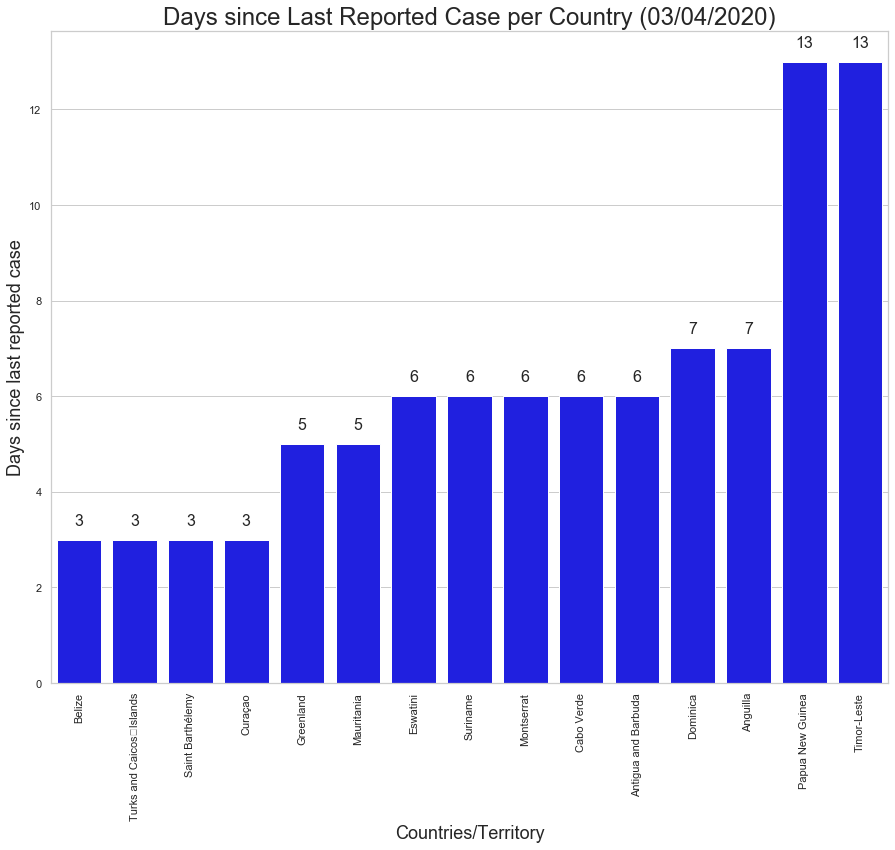

In [12]:
#seaborn defaults
top15DSLRC = dfDSLRC[0:15].sort_values(by=['Days since last reported case'])
DSLRC = top15DSLRC['Days since last reported case']

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Country/Territory',y='Days since last reported case', data=top15DSLRC ,
            label="Days since last reported case", color="blue")
plt.title('Days since Last Reported Case per Country (03/04/2020)',fontsize=24)
plt.ylabel('Days since last reported case',fontsize=18)
plt.xlabel('Countries/Territory',fontsize=18)
plt.xticks(rotation='vertical')
for i in range (0,15):
    plt.text(x=i, y=DSLRC.iloc[i]+0.4 , s=DSLRC.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_DaysSinceLast.png', bbox_inches='tight')
plt.show()

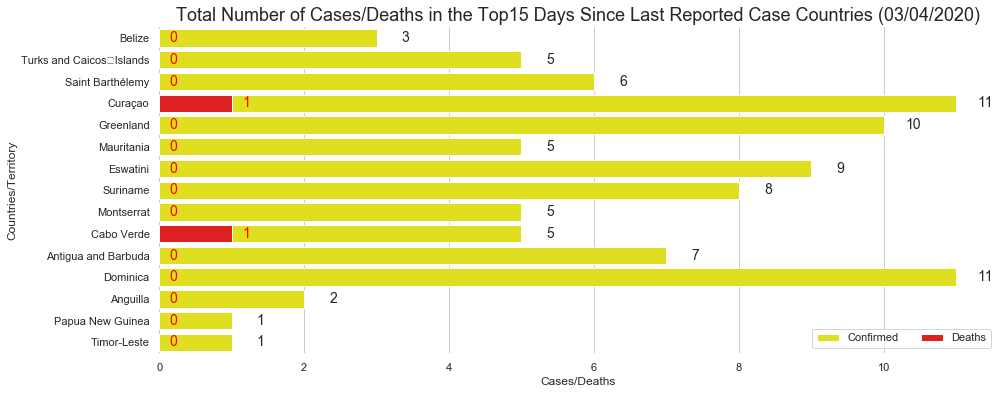

In [13]:
#seaborn defaults
confirmedDSLRC = np.array(top15DSLRC['Total Confirmed'])
deathsDSLRC = np.array(top15DSLRC['Total Deaths'])
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15DSLRC,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15DSLRC ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Days Since Last Reported Case Countries (03/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsDSLRC[i]+0.2, y=i , s=deathsDSLRC[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmedDSLRC[i]+0.4, y=i , s=confirmedDSLRC[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200403_TotalNumberCasesDeathsDSLRC.png', bbox_inches='tight')

In [14]:
Transmission_type = pd.get_dummies(df, columns=['Transmission Classification'])
Transmission_type

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Days since last reported case,Death Rate,Transmission Classification_Imported cases only,Transmission Classification_Local transmission,Transmission Classification_Under investigation
191,Angola,8,0,2,0,1,25.000000,1,0,0
199,Gambia,4,1,1,0,0,25.000000,1,0,0
198,Botswana,4,1,1,0,0,25.000000,1,0,0
107,Sudan,8,1,2,0,0,25.000000,0,1,0
134,Guyana,19,0,4,2,1,21.052632,0,1,0
...,...,...,...,...,...,...,...,...,...,...
144,St. Vincent & Grenadines,2,1,0,0,0,0.000000,1,0,0
143,Belize,3,0,0,0,3,0.000000,0,1,0
104,Djibouti,41,7,0,0,0,0.000000,0,1,0
141,Antigua and Barbuda,7,0,0,0,6,0.000000,1,0,0


In [15]:
print('The number of countries with only imported cases is:',Transmission_type['Transmission Classification_Imported cases only'].sum())

The number of countries with only imported cases is: 32


In [16]:
print('The number of countries with local transmissions cases is:',Transmission_type['Transmission Classification_Local transmission'].sum())

The number of countries with local transmissions cases is: 168


In [17]:
print('The number of countries under investigation to determine the type of transmission is:',Transmission_type['Transmission Classification_Under investigation'].sum())

The number of countries under investigation to determine the type of transmission is: 5


In [28]:
WorldPopulation = pd.read_csv('Data/WorldPopulation.csv')
df['Population'] = 0
for i in range (0,len(df)):
    pop = WorldPopulation.loc[WorldPopulation.loc[:,'Country/Territory']==df.loc[i,'Country/Territory']]
    if pop.empty == True:
        df.loc[i,'Population'] = 0
    else:
        df.loc[i,'Population'] = pop.iloc[0,1]
for i in range (0,len(df)):
    if df.loc[i,'Population'] != 0:
        df.loc[i,'Population Contaminated %'] = df.loc[i,'Total Confirmed']/df.loc[i,'Population']*100
    else:
        df.loc[i,'Population Contaminated %'] = 0
dfPopContaminated = df.sort_values(by=['Population Contaminated %'],ascending=False)

minimum_number_cases = 1 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfPopMinNumCases = dfPopContaminated[dfPopContaminated['Total Confirmed'] > minimum_number_cases]
dfPopMinNumCases = dfPopMinNumCases.reset_index(drop=True)
dfPopMinNumCases.index = np.arange(1, (len(dfPopMinNumCases)+1))
top15_contaminated = dfPopMinNumCases[0:15]
contamination_rate = top15_contaminated.round({'Population Contaminated %':4})
contamination_rate = contamination_rate['Population Contaminated %']

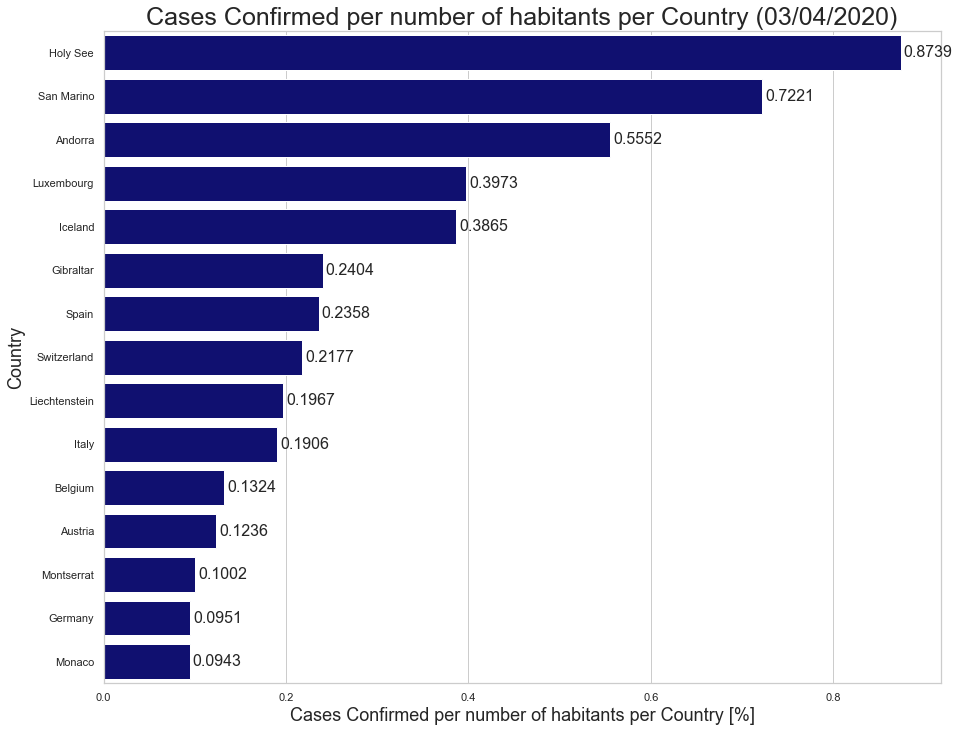

In [29]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Contaminated %',y='Country/Territory', data=top15_contaminated ,
            label="Deaths", color="navy")
plt.title('Cases Confirmed per Number of Habitants per Country (03/04/2020)',fontsize=25)
plt.xlabel('Cases Confirmed per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=contamination_rate.iloc[i]+0.03, y=i , s=contamination_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_ContaminationPerCountry.png', bbox_inches='tight')
plt.show()

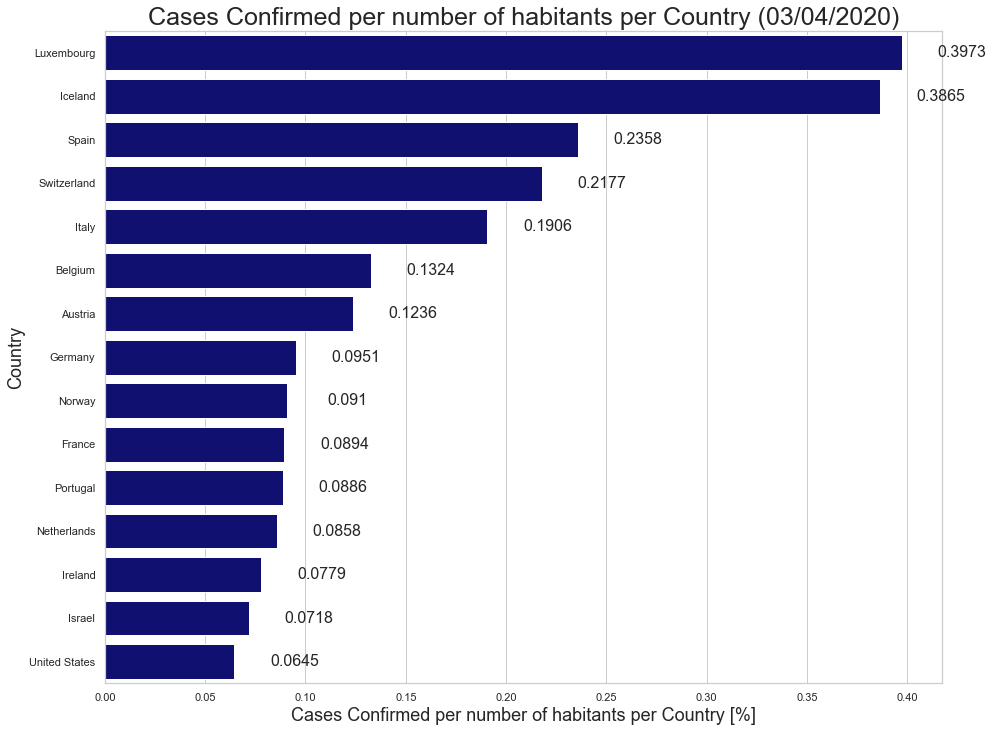

In [30]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfPopMinNumCases = dfPopContaminated[dfPopContaminated['Total Confirmed'] > minimum_number_cases]
dfPopMinNumCases = dfPopMinNumCases.reset_index(drop=True)
dfPopMinNumCases.index = np.arange(1, (len(dfPopMinNumCases)+1))
top15_contaminated = dfPopMinNumCases[0:15]
contamination_rate = top15_contaminated.round({'Population Contaminated %':4})
contamination_rate = contamination_rate['Population Contaminated %']
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Contaminated %',y='Country/Territory', data=top15_contaminated ,
            label="Deaths", color="navy")
plt.title('Cases Confirmed per Number of Habitants per Country (03/04/2020)',fontsize=25)
plt.xlabel('Cases Confirmed per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=contamination_rate.iloc[i]+0.03, y=i , s=contamination_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_ContaminationPerCountry1kCases.png', bbox_inches='tight')
plt.show()

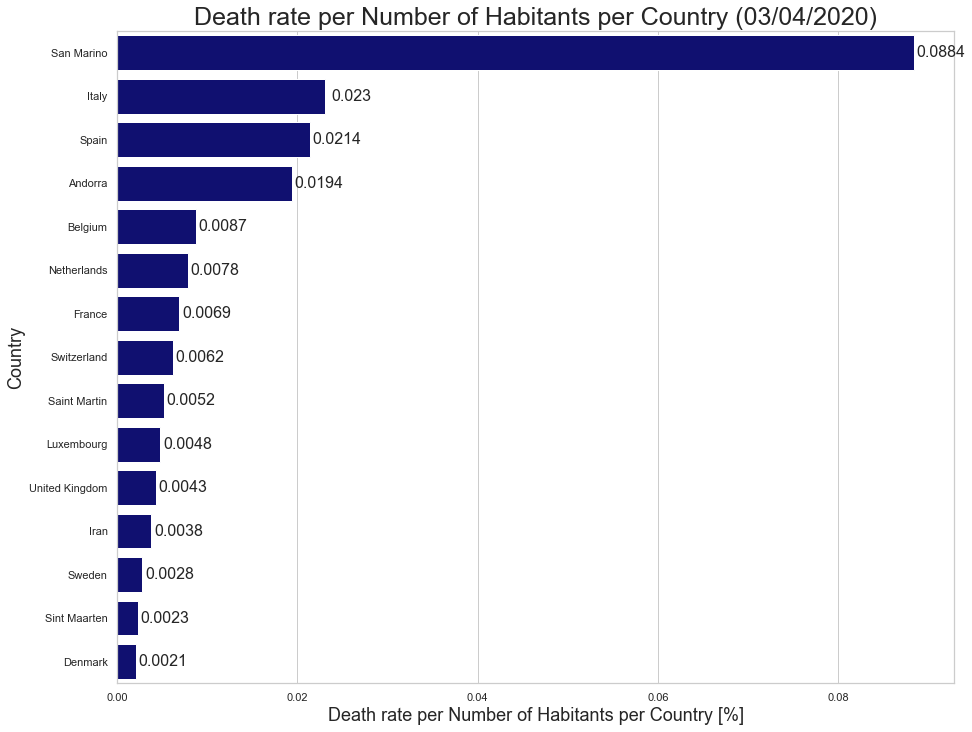

In [33]:
for i in range (0,len(df)):
    if df.loc[i,'Population'] != 0:
        df.loc[i,'Population Death Rate %'] = df.loc[i,'Total Deaths']/df.loc[i,'Population']*100
    else:
        df.loc[i,'Population Death Rate %'] = 0
dfPopDeathRate = df.sort_values(by=['Population Death Rate %'],ascending=False)

minimum_number_cases = 1 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfPopMinNumCases = dfPopDeathRate[dfPopDeathRate['Total Confirmed'] > minimum_number_cases]
dfPopMinNumCases = dfPopMinNumCases.reset_index(drop=True)
dfPopMinNumCases.index = np.arange(1, (len(dfPopMinNumCases)+1))
top15_PopDeathRate = dfPopMinNumCases[0:15]
popDeath_rate = top15_PopDeathRate.round({'Population Death Rate %':4})
popDeath_rate = popDeath_rate['Population Death Rate %']

#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Death Rate %',y='Country/Territory', data=top15_PopDeathRate ,
            label="Deaths", color="navy")
plt.title('Death rate per Number of Habitants per Country (03/04/2020)',fontsize=25)
plt.xlabel('Death rate per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=popDeath_rate.iloc[i]+0.003, y=i , s=popDeath_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_DeathRateinPopPerCountryCases.png', bbox_inches='tight')
plt.show()

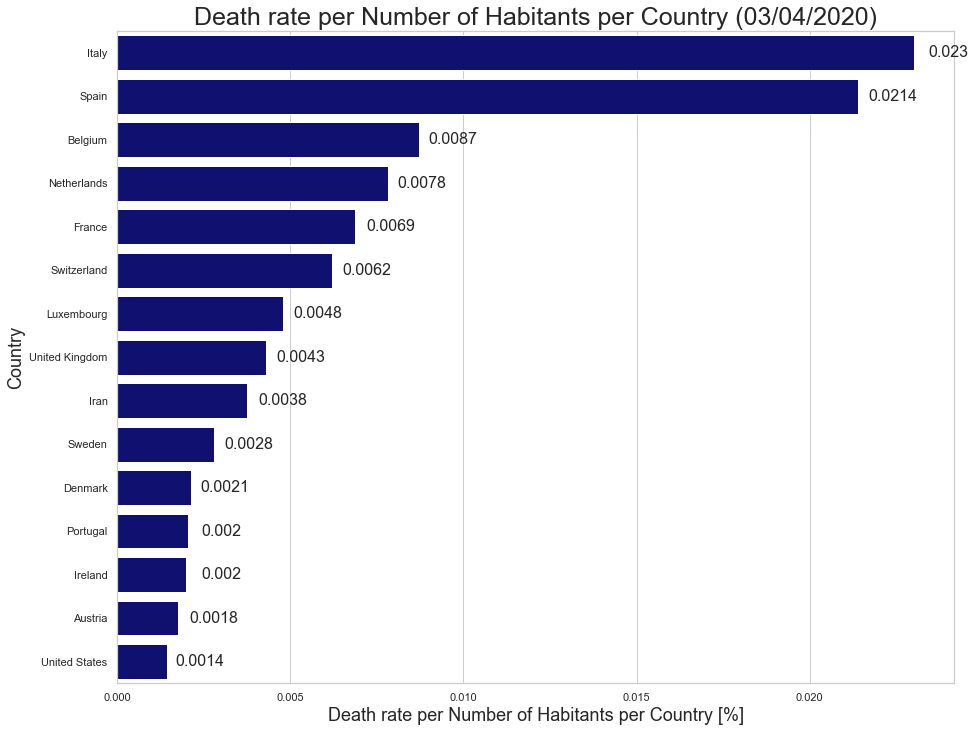

In [36]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfPopMinNumCases = dfPopDeathRate[dfPopDeathRate['Total Confirmed'] > minimum_number_cases]
dfPopMinNumCases = dfPopMinNumCases.reset_index(drop=True)
dfPopMinNumCases.index = np.arange(1, (len(dfPopMinNumCases)+1))
top15_PopDeathRate = dfPopMinNumCases[0:15]
popDeath_rate = top15_PopDeathRate.round({'Population Death Rate %':4})
popDeath_rate = popDeath_rate['Population Death Rate %']

#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Population Death Rate %',y='Country/Territory', data=top15_PopDeathRate ,
            label="Deaths", color="navy")
plt.title('Death rate per Number of Habitants per Country (03/04/2020)',fontsize=25)
plt.xlabel('Death rate per Number of Habitants per Country [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=popDeath_rate.iloc[i]+0.001, y=i , s=popDeath_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200403_DeathRateinPopPerCountry1kCases.png', bbox_inches='tight')
plt.show()

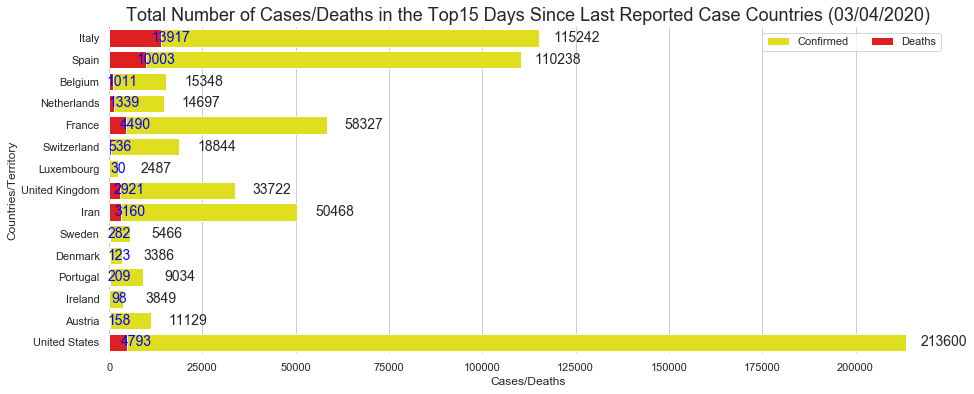

In [45]:
#seaborn defaults
confirmedPop = np.array(top15_PopDeathRate['Total Confirmed'])
deathsPop = np.array(top15_PopDeathRate['Total Deaths'])
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_PopDeathRate,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_PopDeathRate ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Days Since Last Reported Case Countries (03/04/2020)',fontsize=18)
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsPop[i]+2500, y=i , s=deathsPop[i],horizontalalignment='center',verticalalignment='center', color='blue',fontsize=14)
    plt.text(x=confirmedPop[i]+10000, y=i , s=confirmedPop[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200403_TotalNumberCasesDeathsPop.png', bbox_inches='tight')